In [0]:
import pandas as pd
import numpy as np
import plotly.express as px

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
px.imshow(x_train[1])

In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
# Converting o/p to tensor
y_train = np.array(pd.get_dummies(y_train))
y_test = np.array(pd.get_dummies(y_test))

In [0]:
# Feature Scaling
x_train = x_train/255
x_test = x_test/255

In [0]:
# examples, width, height, color channles
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [0]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1328 - accuracy: 0.9599 - val_loss: 0.0602 - val_accuracy: 0.9796
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0470 - accuracy: 0.9854 - val_loss: 0.0389 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0448 - val_accuracy: 0.9845


In [0]:
metrics = pd.DataFrame(model.history.history)

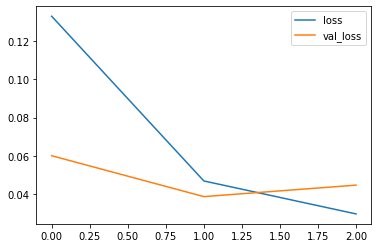

In [0]:
metrics[['loss', 'val_loss']].plot()

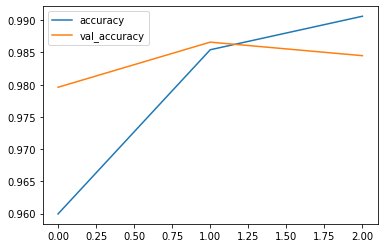

In [0]:
metrics[['accuracy', 'val_accuracy']].plot()

In [0]:
model.evaluate(x_test, y_test, verbose=0)

[0.044829946011304855, 0.984499990940094]

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.96      1.00      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.95      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [0]:
confusion_matrix(y_test, y_pred)

array([[ 972,    0,    1,    0,    0,    3,    2,    1,    1,    0],
       [   0, 1132,    2,    1,    0,    0,    0,    0,    0,    0],
       [   1,    4, 1018,    1,    2,    0,    2,    3,    1,    0],
       [   0,    0,    1, 1007,    0,    1,    0,    1,    0,    0],
       [   0,    0,    0,    0,  977,    0,    0,    0,    0,    5],
       [   0,    0,    0,   10,    0,  881,    1,    0,    0,    0],
       [   1,    2,    0,    0,    1,    7,  946,    0,    1,    0],
       [   0,    1,    6,    2,    0,    0,    0, 1014,    1,    4],
       [   1,    1,    7,   20,    5,    5,    2,    5,  921,    7],
       [   0,    0,    0,    4,   14,    6,    0,    8,    0,  977]])

In [0]:
px.imshow(confusion_matrix(y_test, y_pred))